In [1]:
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import numpy as np

print(tf.__version__)

2.8.2


In [2]:
# Load in the data
data = load_breast_cancer()

In [3]:
# Check the type of 'data'
print("Data type:", type(data))
print("Data Keys:", data.keys())
print("Data Shape:", data.data.shape)

Data type: <class 'sklearn.utils.Bunch'>
Data Keys: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Data Shape: (569, 30)


In [4]:
# print the targets
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [5]:
# their meaning is not lost
print("Target names: ", data.target_names)
print("Target shape", data.target.shape)

Target names:  ['malignant' 'benign']
Target shape (569,)


In [6]:
# Determine the meaning of each feature
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
# Split the data int train and test sets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [8]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Build  de model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [10]:
model.compile(
    optimizer="adam", 
    loss="binary_crossentropy", 
    metrics=["accuracy"]
)

In [11]:
# Train de model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
12/12 [==============================] - 1s 17ms/step - loss: 0.9112 - accuracy: 0.3228 - val_loss: 0.8874 - val_accuracy: 0.2979
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 0.8155 - accuracy: 0.4226 - val_loss: 0.7931 - val_accuracy: 0.4255
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 0.7290 - accuracy: 0.5276 - val_loss: 0.7117 - val_accuracy: 0.5053
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6538 - accuracy: 0.6247 - val_loss: 0.6430 - val_accuracy: 0.6064
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5926 - accuracy: 0.7244 - val_loss: 0.5833 - val_accuracy: 0.7074
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5385 - accuracy: 0.7900 - val_loss: 0.5344 - val_accuracy: 0.7926
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.4948 - accuracy: 0.8294 - val_loss: 0.4929 - val_accuracy: 0.8404
Epoch 8/100


In [12]:
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

12/12 [==============================] - 0s 1ms/step - loss: 0.1000 - accuracy: 0.9790
Train score: [0.09998038411140442, 0.9790025949478149]
6/6 [==============================] - 0s 3ms/step - loss: 0.1216 - accuracy: 0.9415
Test score: [0.12156147509813309, 0.9414893388748169]


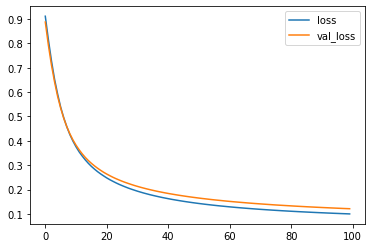

In [13]:
# Plot what's returned by model.fit
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()

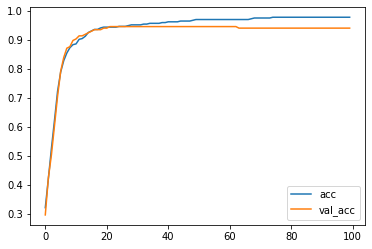

In [14]:
# Plot the accuracy too
plt.plot(r.history["accuracy"], label="acc")
plt.plot(r.history["val_accuracy"], label="val_acc")
plt.legend()

## Making Preditions

In [15]:
# Make predictions
P = model.predict(X_test)
print(P) # they are outputs of the sigmoid, interpreted as probabilities p(y = 1 | x)

[[5.4423892e-01]
 [9.0055752e-01]
 [9.8586839e-01]
 [8.5985661e-04]
 [9.9776393e-01]
 [9.6876222e-01]
 [9.9339485e-01]
 [9.1375792e-01]
 [9.5650077e-01]
 [8.6966157e-04]
 [8.7108648e-01]
 [1.4731330e-01]
 [1.4021012e-07]
 [9.9729228e-01]
 [9.4943857e-01]
 [9.8496222e-01]
 [9.9896610e-01]
 [9.7557604e-02]
 [9.9957550e-01]
 [9.4466120e-02]
 [9.9328172e-01]
 [1.8235207e-02]
 [9.1243911e-01]
 [6.0933530e-03]
 [9.9890828e-01]
 [6.8871166e-05]
 [9.9322224e-01]
 [9.7836322e-01]
 [4.9729049e-03]
 [6.1530769e-03]
 [7.3131806e-01]
 [5.9719145e-02]
 [2.8294325e-04]
 [9.4539261e-01]
 [8.8095868e-01]
 [1.1027396e-02]
 [9.9981320e-01]
 [9.9765313e-01]
 [4.1501786e-05]
 [9.6216249e-01]
 [9.0642244e-01]
 [8.3869636e-01]
 [9.7594547e-01]
 [8.5241795e-03]
 [7.6619101e-01]
 [9.0587795e-01]
 [6.3049215e-01]
 [9.6005297e-01]
 [8.3922780e-01]
 [9.4257271e-01]
 [6.3461065e-04]
 [7.3527062e-01]
 [1.0628473e-07]
 [2.9978156e-04]
 [9.8371089e-01]
 [9.8476374e-01]
 [8.4921122e-03]
 [9.9962604e-01]
 [9.9792850e-0

In [16]:
# Round to get the actual preditions
# Note: has to be flattened since the targets are size (N,) while the predictions are size (N, 1)
P = np.round(P).flatten()
print(P)

[1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1.
 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0.
 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1.
 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1.]


In [17]:
# Calculate the accuracy, compare it to evaluate() output
print("Manually calculated accuracy:", np.mean(P == y_test))
print("Evaluate output:", model.evaluate(X_test, y_test))

Manually calculated accuracy: 0.9414893617021277
6/6 [==============================] - 0s 2ms/step - loss: 0.1216 - accuracy: 0.9415
Evaluate output: [0.12156147509813309, 0.9414893388748169]
